In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load Boston Housing dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing_npz',
    test_split=0.2,
    seed=42
)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Converting Data to DataFrame
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)

In [4]:
# Preview the training data
X_train_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
1,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
2,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
3,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
4,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
5,0.10153,0.0,12.83,0.0,0.437,6.279,74.5,4.0522,5.0,398.0,18.7,373.66,11.97
6,0.31827,0.0,9.90,0.0,0.544,5.914,83.2,3.9986,4.0,304.0,18.4,390.70,18.33
7,0.29090,0.0,21.89,0.0,0.624,6.174,93.6,1.6119,4.0,437.0,21.2,388.08,24.16
8,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,666.0,20.2,395.33,12.87
9,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33


In [5]:
# View summary of datasets
X_train_df.info()
print('_'*40)
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


In [6]:
# distribution of numerical feature values across the samples
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.789989,11.568069,11.214059,0.069307,0.554524,6.284824,69.119307,3.792258,9.660891,408.960396,18.481931,356.293020,12.825520
std,9.132761,24.269648,6.925462,0.254290,0.116408,0.723759,28.034606,2.142651,8.736073,169.685166,2.157322,92.058615,7.308772
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,0.320000,1.920000
25%,0.081960,0.000000,5.190000,0.000000,0.452000,5.878750,45.475000,2.097050,4.000000,281.000000,17.400000,375.085000,7.092500
50%,0.262660,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.167500,5.000000,330.000000,19.100000,391.305000,11.560000
75%,3.717875,12.500000,18.100000,0.000000,0.624000,6.620500,94.425000,5.118000,24.000000,666.000000,20.200000,395.810000,17.167500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
# Create column transformer
ct = make_column_transformer(
 (MinMaxScaler(), [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12])
)

In [8]:
# Normalization and data type change
X_train = ct.fit_transform(X_train).astype('float32')
X_test = ct.transform(X_test).astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [9]:
# Distribution of X_train feature values after normalization
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,0.042528,0.115681,0.394210,0.348815,0.521905,0.681970,0.241618,0.376560,0.423589,0.625737,0.897607,0.302511
std,0.102650,0.242696,0.253866,0.239522,0.138678,0.288719,0.194973,0.379829,0.323827,0.229502,0.232131,0.202740
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.137860,0.444098,0.438466,0.087361,0.130435,0.179389,0.510638,0.944992,0.143481
50%,0.002881,0.000000,0.338343,0.314815,0.507569,0.768280,0.184767,0.173913,0.272901,0.691489,0.985892,0.267406
75%,0.041717,0.125000,0.646628,0.491770,0.586223,0.942585,0.362255,1.000000,0.914122,0.808511,0.997252,0.422954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
# Reserve data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [11]:
# Set random seed
tf.random.set_seed(42)

In [12]:
# Building the model (fixed Input warning)
model = tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),  # Preferred input layer
    tf.keras.layers.Dense(units=64, activation='relu', name='Dense_1'),
    tf.keras.layers.Dense(units=64, activation='relu', name='Dense_2'),
    tf.keras.layers.Dense(units=1, activation='linear', name='Prediction')  # Linear activation for regression
])

In [13]:

# Compiling the model
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),   # Use Mean Squared Error for regression
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),  # Adam optimizer
    metrics=['mse']  # Tracking mean squared error during training
)

In [14]:
# Training the model
history = model.fit(
    X_train,
    y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_val, y_val)
)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 442.9608 - mse: 442.9608 - val_loss: 198.7330 - val_mse: 198.7330
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 190.0284 - mse: 190.0284 - val_loss: 176.2323 - val_mse: 176.2323
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 98.9890 - mse: 98.9890 - val_loss: 82.1761 - val_mse: 82.1761
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 69.8728 - mse: 69.8728 - val_loss: 79.2378 - val_mse: 79.2378
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 52.7737 - mse: 52.7737 - val_loss: 58.5032 - val_mse: 58.5032
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 49.0110 - mse: 49.0110 - val_loss: 56.6067 - val_mse: 56.6067
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.0462 - mse: 42.0462 - val_loss: 48.4113 - val_mse: 48.4113
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 36.5580 - mse: 36.5580 - val_loss: 41.2870 - val_mse: 41.2870
Epoch 9/50
12/12 ━━━━━━━━━━━━━━

In [15]:
# Preview the mean value of training and validation data
print(f"Mean of training data: {y_train.mean()}")
print(f"Mean of validation data: {y_val.mean()}")


Mean of training data: 22.235536575317383
Mean of validation data: 24.897560119628906


In [16]:
# Evaluate the model on the test data
print("Evaluation on Test data \n")
loss, mse = model.evaluate(X_test, y_test, batch_size=32)
print(f"\nModel loss on test set: {loss}")
print(f"Model mean squared error on test set: {mse:.2f}")

Evaluation on Test data 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.4970 - mse: 16.4970 

Model loss on test set: 18.366857528686523
Model mean squared error on test set: 18.37


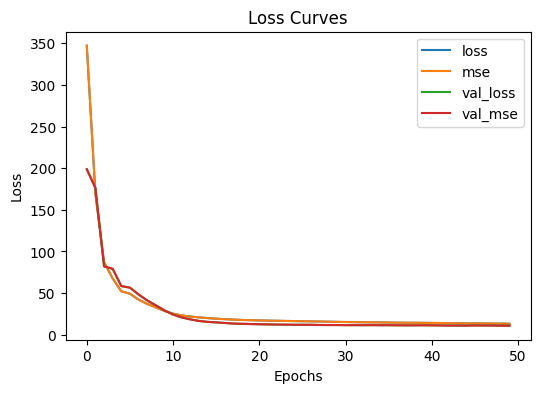

In [17]:
# Plot the loss curves
pd.DataFrame(history.history).plot(figsize=(6, 4), xlabel="Epochs", ylabel="Loss", title='Loss Curves')
plt.show()


In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)
print(f"First prediction: {y_pred[0]}")



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
First prediction: [21.173395]


In [19]:
# Compare actual vs predicted values for the first few entries
comparison = pd.DataFrame({'Actual': y_test[:10], 'Predicted': y_pred[:10].flatten()})
print(comparison)

      Actual  Predicted
0  22.400000  21.173395
1  28.600000  29.394680
2  19.500000  21.103073
3  24.799999  27.887545
4  24.500000  20.678087
5  21.400000  22.068277
6  33.099998  34.864010
7  22.900000  25.239481
8  20.700001  22.882135
9  24.100000  25.358397
